In [2]:
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import hyperopt

from hyperopt import fmin, tpe, hp
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.layers import Dense, Conv2D,Flatten, Dropout, BatchNormalization, MaxPooling2D, RandomFlip, RandomRotation, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#Нормализация входных данных
x_train = x_train / 255
x_test = x_test / 255

#Преобразование выодных значений в векторы по категориям
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

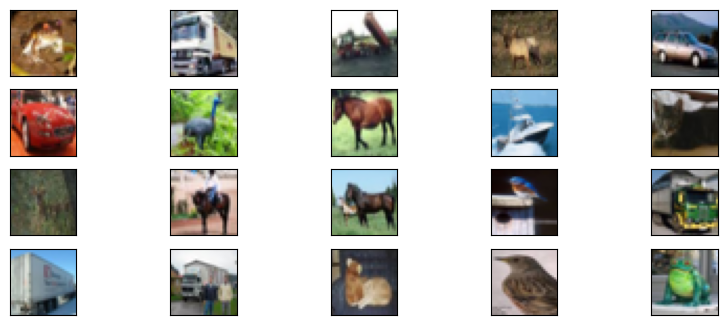

In [4]:
# Отображение первых 10 изображений из обучающей выборки
plt.figure(figsize = (10,5))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap = plt.cm.binary)

plt.show()

In [5]:
# Формирование модели нейронной сети и вывод ее структуры

model = keras.Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32,3,activation ='relu'),
    MaxPooling2D(2,padding='same'),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2,padding = 'same'),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
    
])


In [6]:
# Компиляция нейронной сети с оптимизацией по Adam и критереем категориальной кросс-энтропия
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Запуск процесса обучения : 80% - обучающая выборка, 20% - выборка валидации

his = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 68s 53ms/step - loss: 1.5511 - accuracy: 0.4390 - val_loss: 1.2091 - val_accuracy: 0.5753
Epoch 2/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.1847 - accuracy: 0.5788 - val_loss: 1.0814 - val_accuracy: 0.6278
Epoch 3/10
1250/1250 [==============================] - 63s 51ms/step - loss: 1.0456 - accuracy: 0.6310 - val_loss: 0.9855 - val_accuracy: 0.6523
Epoch 4/10
1250/1250 [==============================] - 66s 53ms/step - loss: 0.9470 - accuracy: 0.6665 - val_loss: 0.9251 - val_accuracy: 0.6833
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.8692 - accuracy: 0.6948 - val_loss: 0.8637 - val_accuracy: 0.7007
Epoch 6/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.8041 - accuracy: 0.7174 - val_loss: 0.8715 - val_accuracy: 0.6946
Epoch 7/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.7516 - accuracy: 0.7346 - val_loss: 0.8549 -

In [8]:
print( model.evaluate(x_test, y_test))

313/313 [==============================] - 4s 14ms/step - loss: 0.8378 - accuracy: 0.7199
[0.8377554416656494, 0.7199000120162964]


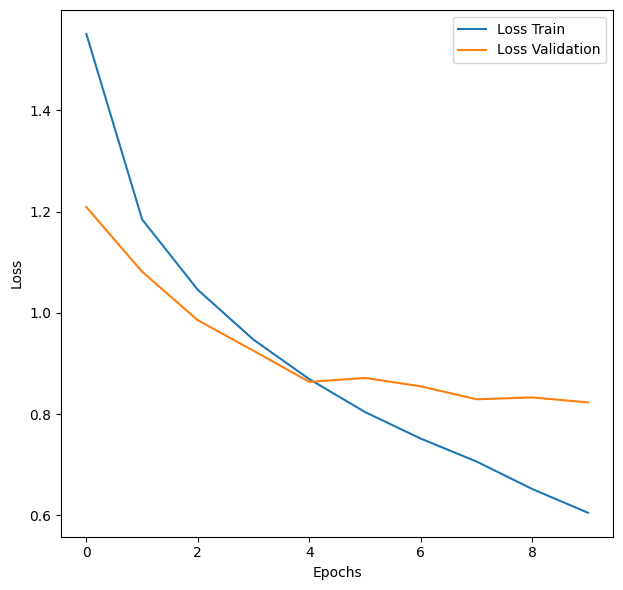

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], label='Loss Train')
plt.plot(his.history['val_loss'], label='Loss Validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

________________

**Использование hyperopt для подбора гиперпараметров**

In [14]:
model = keras.Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32,3,activation ='relu', kernel_initializer='glorot_uniform'),
    MaxPooling2D(2,padding='same'),
    Conv2D(64,3,activation='relu', kernel_initializer='glorot_uniform'),
    MaxPooling2D(2,padding = 'same'),
    Flatten(),
    Dense(256,activation='relu', kernel_initializer='glorot_uniform'),
    Dropout(0.5),
    Dense(10,activation='softmax', kernel_initializer='glorot_uniform')
    
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

his = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)
print( model.evaluate(x_test, y_test))



Epoch 1/10
1250/1250 [==============================] - 66s 52ms/step - loss: 1.5508 - accuracy: 0.4360 - val_loss: 1.2626 - val_accuracy: 0.5613
Epoch 2/10
1250/1250 [==============================] - 62s 50ms/step - loss: 1.2077 - accuracy: 0.5723 - val_loss: 1.1623 - val_accuracy: 0.5986
Epoch 3/10
1250/1250 [==============================] - 62s 50ms/step - loss: 1.0585 - accuracy: 0.6291 - val_loss: 0.9719 - val_accuracy: 0.6609
Epoch 4/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.9563 - accuracy: 0.6640 - val_loss: 0.9328 - val_accuracy: 0.6738
Epoch 5/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.8858 - accuracy: 0.6924 - val_loss: 0.8971 - val_accuracy: 0.6904
Epoch 6/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.8125 - accuracy: 0.7145 - val_loss: 0.8606 - val_accuracy: 0.7031
Epoch 7/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.7685 - accuracy: 0.7295 - val_loss: 0.8589 -

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], label='Loss Train')
plt.plot(his.history['val_loss'], label='Loss Validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()